In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.compat import lzip
from scipy.stats import jarque_bera

%matplotlib inline

In [3]:
df = sns.load_dataset('tips')

In [4]:
df.shape

(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.drop_duplicates(inplace = True)

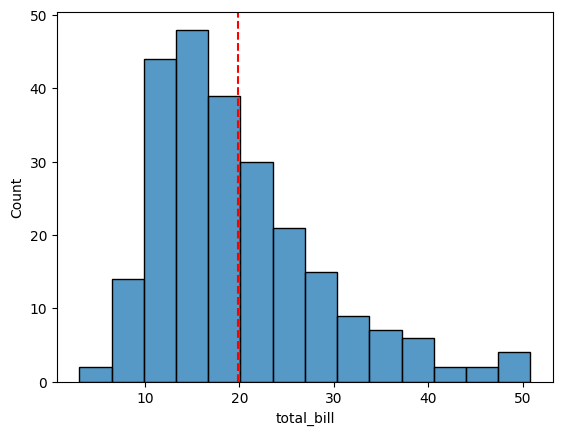

In [8]:
sns.histplot(x = "total_bill", data = df)
plt.axvline(x=np.mean(df['total_bill']), color='r', linestyle='--')

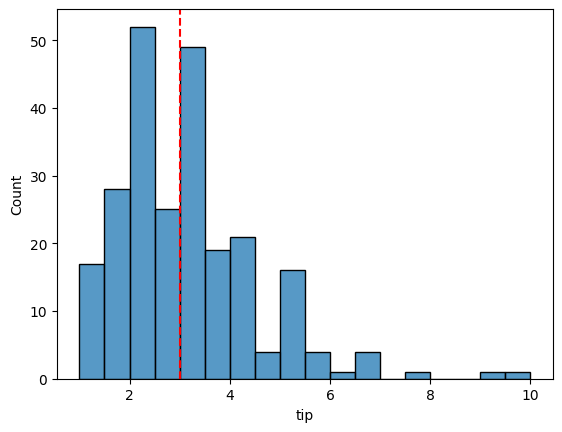

In [9]:
sns.histplot(x = "tip", data = df)
plt.axvline(x=np.mean(df['tip']), color='r', linestyle='--')

<Axes: >

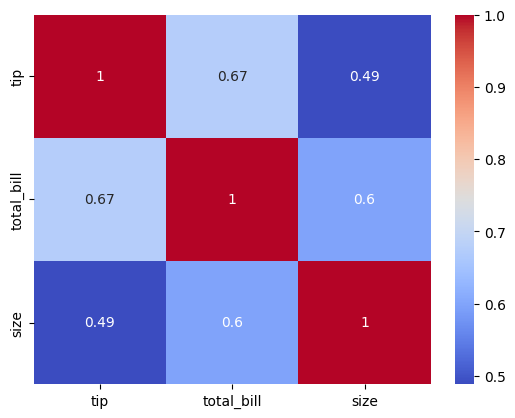

In [23]:
sns.heatmap(df[['tip', 'total_bill','size']].corr(),
            cmap = "coolwarm",
            annot = True)

In [24]:
Y = df['tip']
X = df['total_bill']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     201.7
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.14e-33
Time:                        03:36:24   Log-Likelihood:                -349.56
No. Observations:                 243   AIC:                             703.1
Df Residuals:                     241   BIC:                             710.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9235      0.160      5.756      0.000       0.607       1.240
total_bill     0.1049      0.007     14.202      0.000       0.090       0.119
==============================================================================
Omnibus:                       19.912   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.922
Skew:                           0.441   Prob(JB):                     9.60e-09
Kurtosis:                       4.694   Cond. No.                         53.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='total_bill', ylabel='tip'>

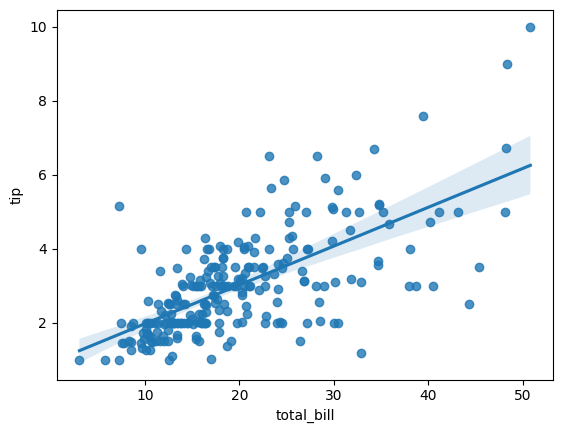

In [34]:
sns.regplot(x = "total_bill",
                y = "tip",
                data = df)

<Axes: xlabel='total_bill', ylabel='tip'>

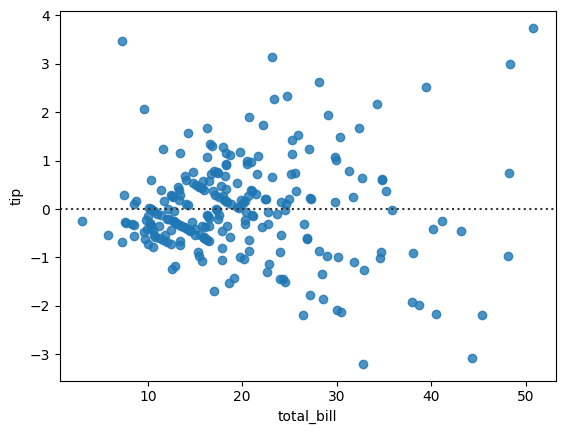

In [50]:
sns.residplot(data=df, x="total_bill", y="tip")

In [53]:
residuals = results.resid
exog_vars = results.model.exog

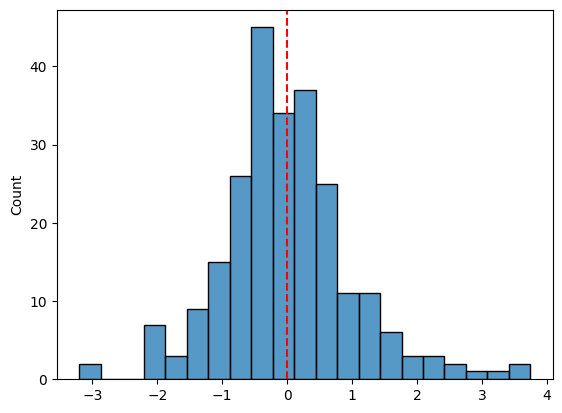

In [60]:
sns.histplot(residuals)
plt.axvline(x=np.mean(residuals), color='r', linestyle='--')

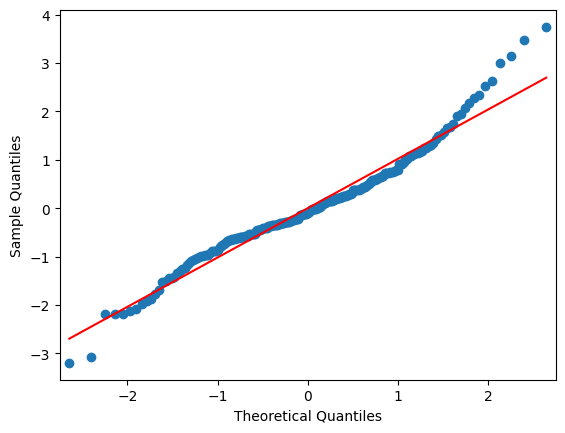

In [58]:
sm.qqplot(residuals, line='s');

In [64]:
jb_statistic, p_value = jarque_bera(df[['tip', 'total_bill']])
print(jb_statistic, p_value)

127.37355492708619 2.1937340560104965e-28


In [66]:
jb_statistic, p_value = jarque_bera(residuals)
print(jb_statistic, p_value)

36.922249105749515 9.603631268342906e-09


In [56]:
bp_test = het_breuschpagan(residuals, exog_vars)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("Breusch-Pagan Test Results:")
print(lzip(labels, bp_test))

Breusch-Pagan Test Results:
[('Lagrange multiplier statistic', np.float64(47.531815861950555)), ('p-value', np.float64(5.411844080023538e-12)), ('f-value', np.float64(58.60374501990496)), ('f p-value', np.float64(4.643431083752339e-13))]


In [57]:
white_test = het_white(residuals, exog_vars)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print("\nWhite's Test Results:")
print(lzip(labels, white_test))



White's Test Results:
[('Test Statistic', np.float64(59.61925054627081)), ('Test Statistic p-value', np.float64(1.1319942902134162e-13)), ('F-Statistic', np.float64(39.01341927582033)), ('F-Test p-value', np.float64(2.1364678635370166e-15))]


In [54]:
durbin_watson(residuals)


np.float64(2.1517744188782886)